In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
data = pd.read_csv('data/show_no_show_ready_to_model.csv')

In [4]:
data.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Gender_M,AppointmentDay_DOW,AppointmentDay_Day_number,AppointmentDay_month,Difference_Days_App_Date_and_Sched_Day
0,62,0,1,0,0,0,0,0,0,0,29,0,0
1,56,0,0,0,0,0,0,0,1,0,29,0,0
2,62,0,0,0,0,0,0,0,0,0,29,0,0
3,8,0,0,0,0,0,0,0,0,0,29,0,0
4,56,0,1,1,0,0,0,0,0,0,29,0,0


In [5]:
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [18]:
pca = decomposition.PCA()

In [19]:
pc = pca.fit_transform(data)

In [20]:
pc= pca.transform(data)

In [21]:
pc.shape

(106490, 13)

In [22]:
pca_df1=pd.DataFrame(pc,columns=["pc"+str(i) for i in range(data.shape[1])])

In [24]:
pca_df1["Show-No_Show"]= data["No-show"]

In [25]:
pca_df1.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,Show-No_Show
0,23.209501,-9.779255,17.026271,2.719227,1.709414,-0.057420,0.656868,0.260794,0.158406,-0.418103,-0.114350,-0.387413,-0.044876,0
1,17.204712,-9.514190,17.003805,2.719841,1.614267,0.895682,0.547262,0.075054,-0.448589,0.180085,0.059939,0.001202,-0.034315,0
2,23.200531,-9.777876,17.026325,2.718992,1.708789,-0.053010,0.673608,0.143952,-0.352870,0.336261,-0.069597,0.003778,-0.023355,0
3,-30.743832,-7.398090,16.822965,2.707186,1.715934,-0.128378,0.718456,0.174364,0.009740,-0.041667,-0.200536,-0.016670,-0.007199,0
4,17.219051,-9.515663,17.003702,2.718789,1.712948,-0.070244,0.657122,0.315292,0.382622,-0.800763,-0.172663,0.529540,-0.066553,0


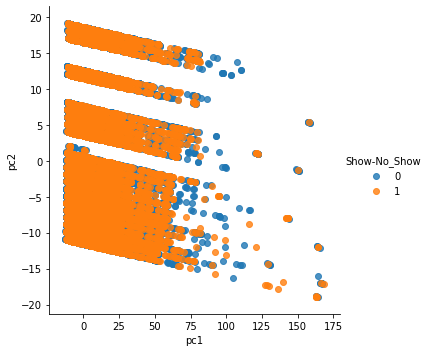

In [27]:
sns.lmplot(x="pc1", y="pc2",hue="Show-No_Show",data=pca_df1, fit_reg=False);

In [28]:
pca.explained_variance_

array([5.05002197e+02, 2.25848498e+02, 8.17219393e+01, 3.49071560e+00,
       2.62571299e-01, 2.30763411e-01, 1.78188102e-01, 1.49919918e-01,
       1.40844413e-01, 1.30801953e-01, 8.61071748e-02, 5.00514821e-02,
       2.66478711e-02])

In [29]:
pca.components_

array([[ 9.98969688e-01, -1.51961321e-03,  8.96974090e-03,
         3.36837755e-03,  1.37314153e-03,  5.28384577e-04,
         3.44034063e-04, -1.10404416e-03, -2.00059670e-03,
         1.39928677e-04, -1.74840124e-03, -8.08070243e-05,
         4.42138354e-02],
       [-4.40701102e-02, -4.45883773e-04, -1.37869568e-03,
        -8.29012090e-04, -1.01405070e-03, -2.66117944e-04,
         1.19783897e-02,  4.93062258e-03, -7.34296266e-04,
        -2.67301383e-03,  4.56610920e-02, -5.03791298e-04,
         9.97894420e-01],
       [ 3.76591900e-03,  1.47581033e-04, -5.37014210e-05,
         2.65938439e-05,  5.07522184e-05, -4.64450489e-06,
        -4.07823187e-03, -4.58087858e-04,  7.56540065e-05,
        -8.63755138e-03,  9.98842751e-01,  1.16993418e-02,
        -4.55040641e-02],
       [ 2.18633550e-04, -1.64245851e-05,  2.34779756e-04,
         8.74005236e-04,  1.47207560e-03,  2.46712619e-04,
        -2.66284462e-02,  1.95507992e-03,  2.16120007e-03,
        -9.99053826e-01, -8.45091275e

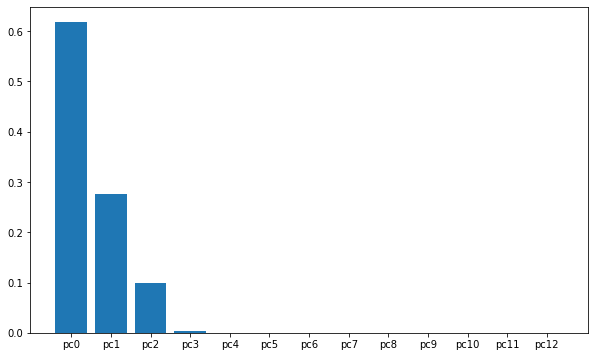

In [30]:
plt.bar(x=["pc"+str(i) for i in range(data.shape[1])], height=pca.explained_variance_ratio_);